## Loading Data

In [1]:
import os
import json
import pandas as pd

def crawl_ducttape_outputs(
    ducttape_output: str,
    results_task: str = "Eval",
    results_json: str = "eval_results",
    use_symlinks: bool = True,
):
    """Crawl the outputs of ducttape jobs"""
    results_dir = os.path.join(ducttape_output, results_task)
    branches_info = []
    for filename in os.listdir(results_dir):
        # check if its not directory
        filepath = os.path.join(results_dir, filename)
        if os.path.isfile(filepath):
            continue
        
        branches = filename.split("+")
        kwargs = {
            branch.split(".")[0]: branch.split(".")[1] 
            for branch in branches
        }

        branches_info.append((filepath, kwargs))

    num_branches = max(len(i[1]) for i in branches_info)
    results = []
    for filepath, kwargs in branches_info:
        # skip folders with less branches (so we dont repeat on symlinks)
        if len(kwargs) < num_branches and use_symlinks:
            continue

        # read results
        result_file = os.path.join(filepath, results_json)
        if not os.path.isfile(result_file):
            print(f"Missing results file: {result_file}")
            continue
        
        with open(os.path.join(filepath, results_json)) as f:
            metrics = json.load(f)
            row = {**kwargs, **metrics}
            results.append(row)

    return pd.DataFrame.from_records(results)

In [24]:
TOWERLLM_OUTS = "/home/patrick/croissllm-evalouts/"
output_df = crawl_ducttape_outputs(TOWERLLM_OUTS, use_symlinks=False)
output_df

Missing results file: /home/patrick/croissllm-evalouts/Eval/DataMix.enplus+EvalExternal.true+EvalIteration.200k+EvalSet.french_wiki+Size.small2/eval_results
Missing results file: /home/patrick/croissllm-evalouts/Eval/DataMix.enplus+EvalExternal.true+EvalIteration.200k+EvalSet.english+Size.small3/eval_results
Missing results file: /home/patrick/croissllm-evalouts/Eval/DataMix.enplus+EvalExternal.true+EvalIteration.200k+EvalSet.french_oscar+Size.small2/eval_results
Missing results file: /home/patrick/croissllm-evalouts/Eval/DataMix.enplus+EvalExternal.true+EvalIteration.200k+EvalSet.french_oscar+Size.small3/eval_results
Missing results file: /home/patrick/croissllm-evalouts/Eval/DataMix.frplus+EvalExternal.true+EvalIteration.200k+EvalSet.code+Size.small3/eval_results
Missing results file: /home/patrick/croissllm-evalouts/Eval/DataMix.frplus+EvalExternal.true+EvalIteration.200k+EvalSet.code+Size.small4/eval_results
Missing results file: /home/patrick/croissllm-evalouts/Eval/EvalExternal.t

,DataMix,EvalExternal,EvalIteration,EvalSet,Size,loss,ppl,ajusted_ppl,token_ratio
0,enplus,true,200k,code,small1,1.318128,3.736419,12.488184,1.915431
1,NaN,true,200k,french_wiki,small4,2.421373,11.261315,59.392047,1.686712
2,frplus,true,200k,english,small3,2.895632,18.094930,124.821504,1.666954
3,enplus,true,200k,english,small2,2.860523,17.470661,117.726029,1.666954
4,NaN,true,200k,french_oscar,small1,2.795559,16.371777,93.044175,1.621527
5,NaN,true,200k,code,small3,1.082466,2.951951,7.951732,1.915431
6,enplus,true,200k,code,small2,1.155135,3.174451,9.139272,1.915431
7,enplus,true,200k,NaN,small3,2.686178,14.675482,30.337064,1.270344
8,frplus,true,200k,french_oscar,small4,2.113782,8.279497,30.801237,1.621527
9,NaN,true,200k,english,small2,2.930993,18.746238,132.400365,1.666954


In [25]:
# replace NaNs with some and get of fixed step
# output_df['EvalSet'] = output_df['EvalSet'].fillna('wiki')
STEP="200k"
output_df['DataMix'] = output_df['DataMix'].fillna('equal')
output_df = output_df[output_df['EvalIteration'] == STEP]
#output_df['EvalSet'] = 'wiki'
output_df['EvalSet'] = output_df['EvalSet'].fillna('wiki')
output_df

/tmp/ipykernel_6310/3978638422.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df['EvalSet'] = output_df['EvalSet'].fillna('wiki')


,DataMix,EvalExternal,EvalIteration,EvalSet,Size,loss,ppl,ajusted_ppl,token_ratio
0,enplus,true,200k,code,small1,1.318128,3.736419,12.488184,1.915431
1,equal,true,200k,french_wiki,small4,2.421373,11.261315,59.392047,1.686712
2,frplus,true,200k,english,small3,2.895632,18.094930,124.821504,1.666954
3,enplus,true,200k,english,small2,2.860523,17.470661,117.726029,1.666954
4,equal,true,200k,french_oscar,small1,2.795559,16.371777,93.044175,1.621527
5,equal,true,200k,code,small3,1.082466,2.951951,7.951732,1.915431
6,enplus,true,200k,code,small2,1.155135,3.174451,9.139272,1.915431
7,enplus,true,200k,wiki,small3,2.686178,14.675482,30.337064,1.270344
8,frplus,true,200k,french_oscar,small4,2.113782,8.279497,30.801237,1.621527
9,equal,true,200k,english,small2,2.930993,18.746238,132.400365,1.666954


In [26]:
import yaml

CONFIGS_FOLDER = "../configs/models"
SIZE_CONFIGS = {
    "base": os.path.join(CONFIGS_FOLDER, "llama2_1b3.yml"),
    "small4": os.path.join(CONFIGS_FOLDER, "llama2_440m.yml"),
    "small3": os.path.join(CONFIGS_FOLDER, "llama2_268m.yml"),
    "small2": os.path.join(CONFIGS_FOLDER, "llama2_166m.yml"),
    "small1": os.path.join(CONFIGS_FOLDER, "llama2_58m.yml"),
}

def get_size(
    hidden_size,
    ffn_hidden_size,
    num_layers,
    num_attention_heads,
    num_kv_heads,
    *args,
    vocab_size=32000,
    return_embeddings=True,
    **kwargs,
):
    embeddings_ps = vocab_size * hidden_size
    grouped_size = hidden_size // (num_attention_heads // num_kv_heads)
    layer_attn_ps = hidden_size * hidden_size * 2  + grouped_size * hidden_size * 2
    layer_ffn_ps = hidden_size * ffn_hidden_size * 3
    layer_ln_ps = hidden_size * 2
    layer_ps = layer_attn_ps + layer_ffn_ps + layer_ln_ps
    decoder_ps = hidden_size * vocab_size 

    total_ps = num_layers * layer_ps 
    if return_embeddings:
        total_ps += embeddings_ps + decoder_ps
    return total_ps

def get_scaling_df(output_df):
    df = output_df.copy()
    def _get_size_from_name(name):
        config_f = SIZE_CONFIGS[name]
        with open(config_f) as f:
            config = yaml.load(f, Loader=yaml.FullLoader)
        return get_size(**config, return_embeddings=False)
        
    df["Params"] = df["Size"].apply(_get_size_from_name)
    # order columns to have Size and Params first, and sort by Params
    df = df[["Size", "Params"] + [c for c in df.columns if c not in ["Size", "Params"]]]
    df = df.sort_values("Params")
    return df

In [27]:
scaling_df = get_scaling_df(output_df)
scaling_df

,Size,Params,DataMix,EvalExternal,EvalIteration,EvalSet,loss,ppl,ajusted_ppl,token_ratio
0,small1,25171968,enplus,true,200k,code,1.318128,3.736419,12.488184,1.915431
22,small1,25171968,frplus,true,200k,french_wiki,2.949530,19.096983,144.750192,1.686712
13,small1,25171968,enplus,true,200k,french_wiki,3.074019,21.628663,178.571055,1.686712
12,small1,25171968,enplus,true,200k,wiki,3.205614,24.670651,58.687850,1.270344
24,small1,25171968,frplus,true,200k,code,1.357299,3.885683,13.461208,1.915431
10,small1,25171968,equal,true,200k,wiki,3.320874,27.684529,67.941821,1.270344
25,small1,25171968,enplus,true,200k,french_oscar,2.920135,18.543800,113.872379,1.621527
19,small1,25171968,equal,true,200k,english,3.224495,25.140885,215.958304,1.666954
17,small1,25171968,equal,true,200k,french_wiki,2.994526,19.975897,156.163690,1.686712
31,small1,25171968,frplus,true,200k,english,3.357282,28.711046,269.463816,1.666954


## Compute Scaling Law

In [29]:
import numpy as np
from scipy.optimize import curve_fit

include = ["small1", "small2", "small3"]

# Define the power law function
def power_law(x, alpha, beta): # L):
    return beta * np.power(x, alpha)# + L

def compute_scaling(df):
    # Extract the data from the DataFrame
    x_data = df['Params'].values
    y_data = df['loss'].values

    if len(x_data) < 2:
        return None

    params, _ = curve_fit(power_law, x_data, y_data, maxfev=10000)
    return params

# Fit the power law to the data
# How to group?
laws_params = {}
for grp_name, grp_df in scaling_df.groupby(["DataMix", "EvalSet"]):
    laws_params[grp_name] = compute_scaling(grp_df)

for grp_name, params in laws_params.items():
    print(f"fitted params for {grp_name}: {params}")

fitted params for ('enplus', 'code'): [-0.0995897   7.20355652]
fitted params for ('enplus', 'english'): [-0.06688851  9.81180985]
fitted params for ('enplus', 'french_oscar'): None
fitted params for ('enplus', 'french_wiki'): None
fitted params for ('enplus', 'wiki'): [-0.08188432 12.95764874]
fitted params for ('equal', 'code'): [-0.10123518  7.51612109]
fitted params for ('equal', 'english'): [-0.07092195 10.80485951]
fitted params for ('equal', 'french_oscar'): [-0.09354763 13.7753352 ]
fitted params for ('equal', 'french_wiki'): [-0.08192939 12.09948879]
fitted params for ('equal', 'wiki'): [-0.08448286 14.0097766 ]
fitted params for ('frplus', 'code'): None
fitted params for ('frplus', 'english'): [-0.07069895 11.19943568]
fitted params for ('frplus', 'french_oscar'): [-0.0973231  14.31825917]
fitted params for ('frplus', 'french_wiki'): [-0.08048418 11.62666893]
fitted params for ('frplus', 'wiki'): [-0.08091149 13.8041556 ]


/home/patrick/.miniconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


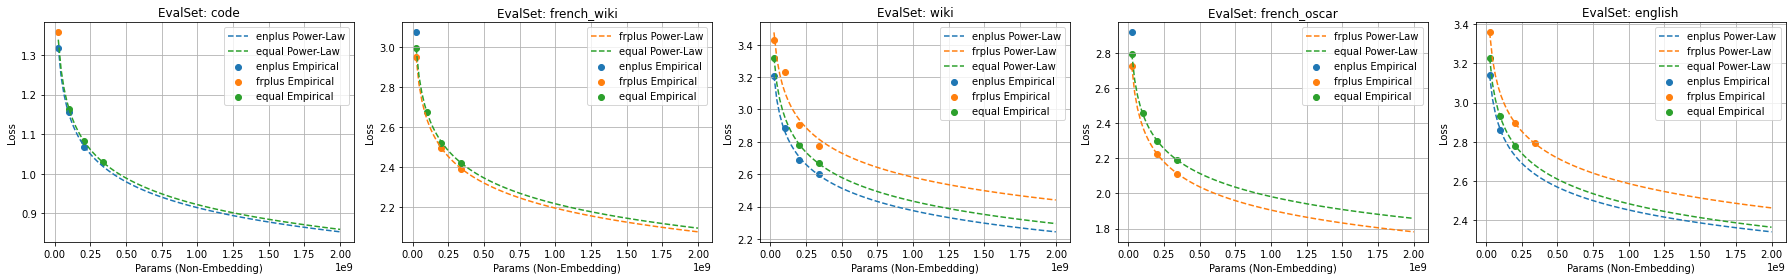

In [30]:
import matplotlib.pyplot as plt

# Generate x values for the fitted curve
# Create a list of unique EvalSets and DataMixes
eval_sets = scaling_df['EvalSet'].unique()
data_mixes = scaling_df['DataMix'].unique()

# Create a color map for the DataMixes
color_map = {data_mix: f'C{i}' for i, data_mix in enumerate(data_mixes)}

# Create a subplot for each EvalSet
x_min, x_max = scaling_df['Params'].min(), 2e9
fig, axs = plt.subplots(1, len(eval_sets), figsize=(5*len(eval_sets), 4))
axs = [axs] if len(eval_sets) == 1 else axs

for ax, eval_set in zip(axs, eval_sets):
    # For each EvalSet, plot the scaling laws and data points for each DataMix
    for data_mix in data_mixes:
        # Filter the DataFrame for the current EvalSet and DataMix
        df = scaling_df[(scaling_df['EvalSet'] == eval_set) & (scaling_df['DataMix'] == data_mix)]
        
        # Extract the data from the DataFrame
        x_data = df['Params'].values
        y_data = df['loss'].values

        # Plot the original data as scatter plot
        ax.scatter(x_data, y_data, color=color_map[data_mix], label=f'{data_mix} Empirical')

        # Compute the y values of the fitted curve
        params = laws_params[(data_mix, eval_set)]
        if params is None:
            continue
        x_scale = np.linspace(x_min, x_max, 100)
        y_scale = power_law(x_scale, *params)

        # Plot the fitted curve
        ax.plot(x_scale, y_scale, color=color_map[data_mix], linestyle='--', label=f'{data_mix} Power-Law')

    # Add labels and legend
    ax.set_xlabel('Params (Non-Embedding)')
    ax.set_ylabel('Loss')
    ax.set_title(f'EvalSet: {eval_set}')
    ax.legend()
    ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()